In [1]:
import numpy as np
import cv2
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 

In [2]:
path = 'uoregon_game.jpeg'

In [3]:
img = mpimg.imread(path)

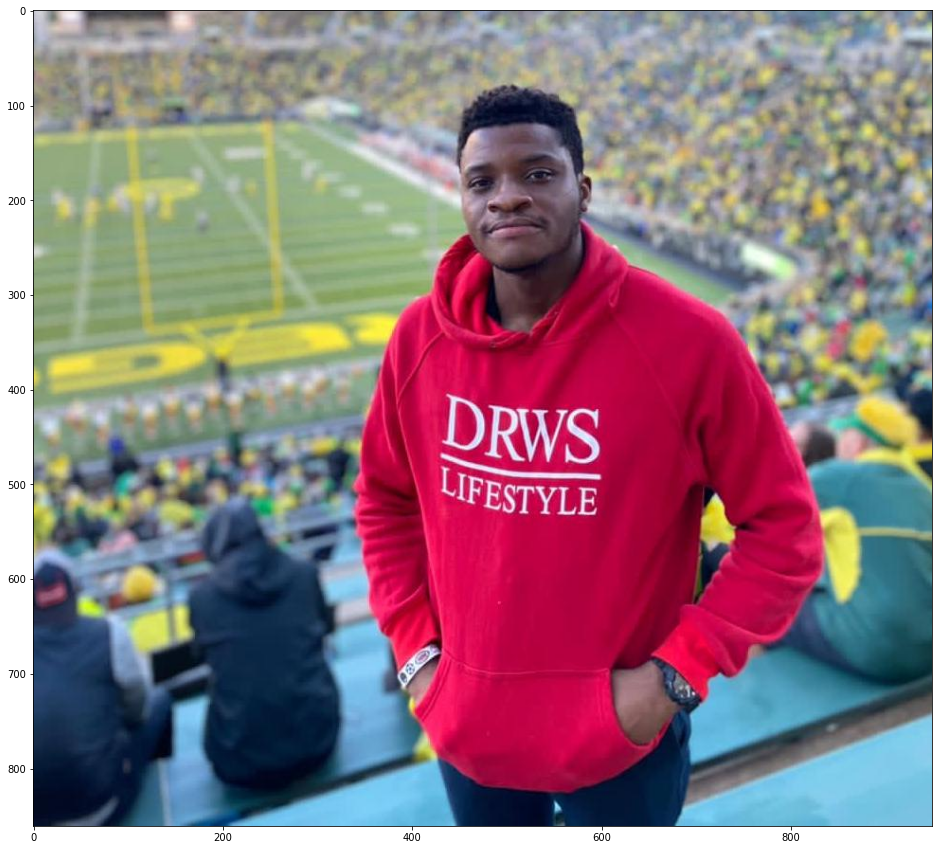

In [4]:
plt.rcParams['figure.figsize'] = [18, 15]
plt.imshow(img)

In [5]:
# Create a mapping function 

def mapping_func(x, y):
    spl = UnivariateSpline(x, y)
    return spl(range(256))

In [7]:
def apply_warm(image):
    increase = mapping_func([0, 64, 128, 192, 256], [0, 70, 140, 210, 256])
    decrease = mapping_func([0, 64, 128, 192, 256], [0, 40, 90, 150, 256])
    red, green, blue = cv2.split(image)
    red = cv2.LUT(red, increase).astype(np.uint8)
    blue = cv2.LUT(blue, decrease).astype(np.uint8)
    image = cv2.merge((red, green, blue))
    return image 

def apply_cool(image):
    increase = mapping_func([0, 64, 128, 192, 256], [0, 70, 140, 210, 256])
    decrease = mapping_func([0, 64, 128, 192, 256], [0, 40, 90, 150, 256])
    red, green, blue = cv2.split(image)
    red = cv2.LUT(red, decrease).astype(np.uint8)
    blue = cv2.LUT(blue, increase).astype(np.uint8)
    image = cv2.merge((red, green, blue))
    return image 

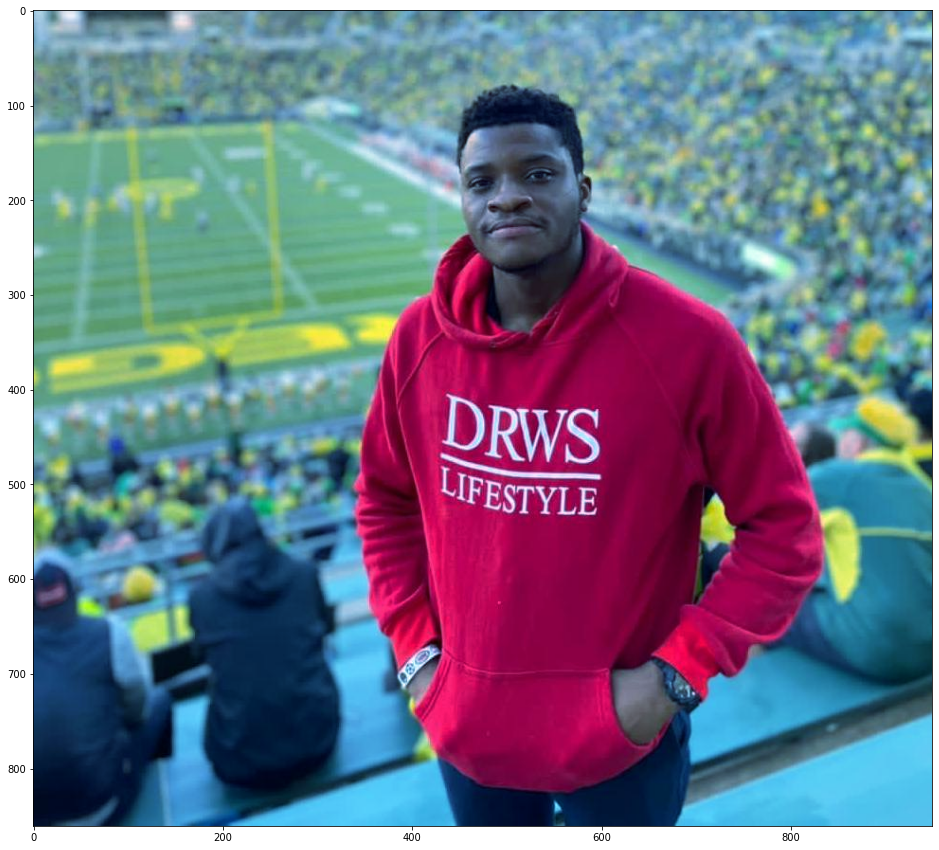

In [8]:
new_image = apply_cool(img)
plt.imshow(new_image)

In [10]:
from ipywidgets import interact, interactive, fixed 
import ipywidgets as widgets 

def choice(x,img):
    if x == 'Warm':
        return plt.imshow(apply_warm(img))
    if x == 'Cool':
        return plt.imshow(apply_cool(img))
    if x == 'Original':
        return plt.imshow(img)

interactive(children=(Dropdown(description='Filter', options=('Original', 'Warm', 'Cool'), value='Original'), …

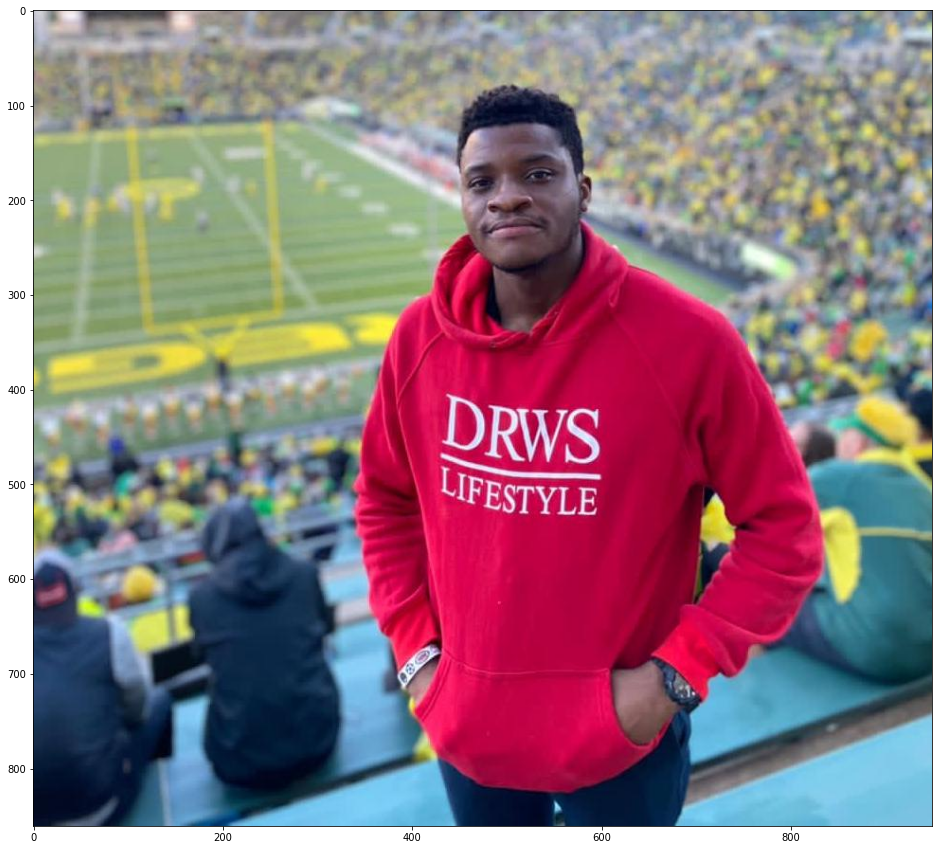

In [11]:
interact(choice, x= widgets.Dropdown(options=['Original', 'Warm', 'Cool'], description='Filter'), img=fixed(img));